#Python Data Science Toolbox (Part 2)
## 1. Using iterators in PythonLand
## 2. List comprehensions and generators
## 3. Bringing it all together!

## 1. Using iterators in PythonLand

In [5]:
# 1.1 Iterators vs Iterables
# Iterators vs Iterables

flash1 = ['jay garrick', 'barry allen', 'wally west', 'bart allen']
flash2 = iter(flash1)

print(next(flash2))
print(next(flash2))
print(next(flash2))
print(next(flash2))

jay garrick
barry allen
wally west
bart allen


Iterators vs Iterables

- an iterable is an object that can return an iterator
- an iterator is an object that keeps state and produces the next value when you call next() on it

In this exercise, you will identify which object is an iterable and which is an iterator.
- [ ] Both flash1 and flash2 are iterators.
- [ ] Both flash1 and flash2 are iterables.
- [x] flash1 is an iterable and flash2 is an iterator.

In [6]:
# Iterating over iterables (1)

# Create a list of strings: flash
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

# Print each list item in flash using a for loop
for person in flash:
    print(person)

# Create an iterator for flash: superhero
superhero = iter(flash)

# Print each item from the iterator
print(next(superhero))
print(next(superhero))
print(next(superhero))
print(next(superhero))

jay garrick
barry allen
wally west
bart allen
jay garrick
barry allen
wally west
bart allen


In [9]:
# Iterating over iterables (2)

# Create an iterator for range(3): small_value
small_value = iter(range(3))

# Print the values in small_value
print(next(small_value))
print(next(small_value))
print(next(small_value))

# Loop over range(3) and print the values
for num in range(3):
    print(num)

# Create an iterator for range(10 ** 100): googol
googol = iter(range(10 ** 100))

# Print the first 5 values from googol
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))

0
1
2
0
1
2
0
1
2
3
4


In [10]:
# Iterators as function arguments

# Create a range object: values
values = range(10, 21)

# Print the range object
print(values)

# Create a list of integers: values_list
values_list = list(values)

# Print values_list
print(values_list)

# Get the sum of values: values_sum
values_sum = sum(values)

# Print values_sum
print(values_sum)

range(10, 21)
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
165


In [11]:
# 1.2 Playing with iterators

# Using enumerate

# Create a list of strings: mutants
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pryde']

# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

# Unpack and print the tuple pairs
for index1, value1 in enumerate(mutants):
    print(index1, value1)

# Change the start index
for index2, value2 in enumerate(mutants, 1):
    print(index2, value2)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


In [15]:
# Using zip

mutants =['charles xavier',
 'bobby drake',
 'kurt wagner',
 'max eisenhardt',
 'kitty pryde']

aliases = ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']

powers = ['telepathy',
 'thermokinesis',
 'teleportation',
 'magnetokinesis',
 'intangibility']

# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants, aliases, powers))

# Print the list of tuples
print(mutant_data)

# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)

# Print the zip object
print(mutant_zip)

# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]
charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


In [19]:
# Using * and zip to 'unzip'

mutants = ('charles xavier',
 'bobby drake',
 'kurt wagner',
 'max eisenhardt',
 'kitty pryde')

powers = ('telepathy',
 'thermokinesis',
 'teleportation',
 'magnetokinesis',
 'intangibility')

# Create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# Print the tuples in z1 by unpacking with *
print(*z1)

# Re-create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

# Check if unpacked tuples are equivalent to original tuples
print(result1 == mutants)
print(result2 == powers)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')
True
True


In [24]:
# 1.3 Using iterators to load large files into memory

# Processing large amounts of Twitter data

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/tweets.csv'

# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv(fname, chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)


{'en': 97, 'et': 1, 'und': 2}


In [25]:
# Extracting information for large amounts of Twitter data

# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize = c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/tweets.csv'

# Call count_entries(): result_counts
result_counts = count_entries(fname, 10, 'lang')

# Print result_counts
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


## 2. List comprehensions and generators

In [31]:
# 2.1 List comprehensions

doctors = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']
new_doctors = []

for doctor in doctors:    
  new_doctors.append(doctor)
print(new_doctors)

new_doctors = [doctor for doctor in doctors]
print(new_doctors)

doc = iter(doctors)
new_doctors = [doc[0] for doc in doctors]
print(new_doctors)

['house', 'cuddy', 'chase', 'thirteen', 'wilson']
['house', 'cuddy', 'chase', 'thirteen', 'wilson']
['h', 'c', 'c', 't', 'w']


- Write a basic list comprehension

`doctor = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']`

How would a list comprehension that produces a list of the first character of each string in doctor look like? 

Note that the list comprehension uses doc as the iterator variable. What will the output be?

- [ ] The list comprehension is [for doc in doctor: doc[0]] and produces the list ['h', 'c', 'c', 't', 'w'].
- [x] The list comprehension is [doc[0] for doc in doctor] and produces the list ['h', 'c', 'c', 't', 'w'].
- [ ] The list comprehension is [doc[0] in doctor] and produces the list ['h', 'c', 'c', 't', 'w'].

List comprehension over iterables

Given the following objects below, which of these can we build list comprehensions over?

```
doctor = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']
range(50)
underwood = 'After all, we are nothing more or less than what we choose to reveal.'
jean = '24601'
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']
valjean = 24601
```

- [ ] You can build list comprehensions over all the objects except the string of number characters jean.
- [ ] You can build list comprehensions over all the objects except the string lists doctor and flash.
- [ ] You can build list comprehensions over all the objects except range(50).
- [x] You can build list comprehensions over all the objects except the integer object valjean.

In [33]:
# Writing list comprehensions

# Create list comprehension: squares
squares = [i ** 2 for i in range(0, 10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [34]:
# Nested list comprehensions

# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(0, 5)] for row in range(0,5)]
print(matrix)
# Print the matrix
for row in matrix:
    print(row)


[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [35]:
# 2.2 Advanced comprehensions

# Using conditionals in comprehensions (1)

# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship]
new_fellowship = [member for member in fellowship if len(member) >= 7]

# Print the new list
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [36]:
# Using conditionals in comprehensions (2)

# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member) >= 7 else '' for member in fellowship]

# Print the new list
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


In [37]:
# Dict comprehensions

# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create dict comprehension: new_fellowship
new_fellowship = {member: len(member) for member in fellowship}

# Print the new dictionary
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


- 2.3 Introduction to generator expressions
- List comprehensions vs generators

```
# List of strings
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']
# List comprehension
fellow1 = [member for member in fellowship if len(member) >= 7]
# Generator expression
fellow2 = (member for member in fellowship if len(member) >= 7)
```

Select from the options below the best description for the difference between list comprehensions and generators.

- [ ] List comprehensions and generators are not different at all; they are just different ways of writing the same thing.
- [x] A list comprehension produces a list as output, a generator produces a generator object.
- [ ] A list comprehension produces a list as output that can be iterated over, a generator produces a generator object that can't be iterated over.

In [38]:
# Write your own generator expressions

# Create generator object: result
result = (num for num in range(31))

# Print the first 5 values
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

# Print the rest of the values
for value in result:
    print(value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [39]:
# Changing the output in generator expressions

# Create a list of strings: lannister
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Create a generator object: lengths
lengths = (len(person) for person in lannister)

# Iterate over and print the values in lengths
for value in lengths:
    print(value)

6
5
5
6
7


In [40]:
# Build a generator

# Create a list of strings
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Define generator function get_lengths
def get_lengths(input_list):
    """Generator function that yields the
    length of the strings in input_list."""

    # Yield the length of a string
    for person in input_list:
        yield len(person)

# Print the values generated by get_lengths()
for value in get_lengths(lannister):
    print(value)

6
5
5
6
7


In [44]:
# 2.4 Wrapping up comprehensions and generators.

# List comprehensions for time-stamped data

# Import pandas
import pandas as pd

# Import Twitter data as DataFrame: df
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/tweets.csv'
df = pd.read_csv(fname)

# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time]

# Print the extracted times
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

In [45]:
# Conditional list comprehensions for time-stamped data

# Import pandas
import pandas as pd

# Import Twitter data as DataFrame: df
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/tweets.csv'
df = pd.read_csv(fname)

# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

# Print the extracted times
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


## 3. Bringing it all together!

In [49]:
# 3.1 Welcome to the case study!

# Dictionaries for data science

feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = ['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
  'SP.ADO.TFRT', '1960', '133.56090740552298']

# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [52]:
# Writing a function to help you

# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = ['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
  'SP.ADO.TFRT', '1960', '133.56090740552298']

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [55]:
# Using a list comprehension

feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_lists = [['Arab World',
  'ARB',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)',
  'SP.ADO.TFRT',
  '1960',
  '133.56090740552298'],
 ['Arab World',
  'ARB',
  'Age dependency ratio (% of working-age population)',
  'SP.POP.DPND',
  '1960',
  '87.7976011532547'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, old (% of working-age population)',
  'SP.POP.DPND.OL',
  '1960',
  '6.634579191565161'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, young (% of working-age population)',
  'SP.POP.DPND.YG',
  '1960',
  '81.02332950839141'],
 ['Arab World',
  'ARB',
  'Arms exports (SIPRI trend indicator values)',
  'MS.MIL.XPRT.KD',
  '1960',
  '3000000.0'],
 ['Arab World',
  'ARB',
  'Arms imports (SIPRI trend indicator values)',
  'MS.MIL.MPRT.KD',
  '1960',
  '538000000.0'],
 ['Arab World',
  'ARB',
  'Birth rate, crude (per 1,000 people)',
  'SP.DYN.CBRT.IN',
  '1960',
  '47.697888095096395'],
 ['Arab World',
  'ARB',
  'CO2 emissions (kt)',
  'EN.ATM.CO2E.KT',
  '1960',
  '59563.9892169935'],
 ['Arab World',
  'ARB',
  'CO2 emissions (metric tons per capita)',
  'EN.ATM.CO2E.PC',
  '1960',
  '0.6439635478877049'],
 ['Arab World',
  'ARB',
  'CO2 emissions from gaseous fuel consumption (% of total)',
  'EN.ATM.CO2E.GF.ZS',
  '1960',
  '5.041291753975099'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (% of total)',
  'EN.ATM.CO2E.LF.ZS',
  '1960',
  '84.8514729446567'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (kt)',
  'EN.ATM.CO2E.LF.KT',
  '1960',
  '49541.707291032304'],
 ['Arab World',
  'ARB',
  'CO2 emissions from solid fuel consumption (% of total)',
  'EN.ATM.CO2E.SF.ZS',
  '1960',
  '4.72698138789597'],
 ['Arab World',
  'ARB',
  'Death rate, crude (per 1,000 people)',
  'SP.DYN.CDRT.IN',
  '1960',
  '19.7544519237187'],
 ['Arab World',
  'ARB',
  'Fertility rate, total (births per woman)',
  'SP.DYN.TFRT.IN',
  '1960',
  '6.92402738655897'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions',
  'IT.MLT.MAIN',
  '1960',
  '406833.0'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions (per 100 people)',
  'IT.MLT.MAIN.P2',
  '1960',
  '0.6167005703199'],
 ['Arab World',
  'ARB',
  'Hospital beds (per 1,000 people)',
  'SH.MED.BEDS.ZS',
  '1960',
  '1.9296220724398703'],
 ['Arab World',
  'ARB',
  'International migrant stock (% of population)',
  'SM.POP.TOTL.ZS',
  '1960',
  '2.9906371279862403'],
 ['Arab World',
  'ARB',
  'International migrant stock, total',
  'SM.POP.TOTL',
  '1960',
  '3324685.0']]

# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}


In [56]:
# Turning this all into a DataFrame

import pandas as pd 

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)

# Print the head of the DataFrame
print(df.head())

  CountryName CountryCode  ...  Year               Value
0  Arab World         ARB  ...  1960  133.56090740552298
1  Arab World         ARB  ...  1960    87.7976011532547
2  Arab World         ARB  ...  1960   6.634579191565161
3  Arab World         ARB  ...  1960   81.02332950839141
4  Arab World         ARB  ...  1960           3000000.0

[5 rows x 6 columns]


In [80]:
# 3.2 Using Python generators for streaming data

# Processing data in chunks (1)

# Open a connection to the file
fname = '/content/drive/MyDrive/datasets/world_ind_pop_data.csv'

with open(fname) as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0, 1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

In [81]:
# Writing a generator to load data in chunks (2)

# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
fname = '/content/drive/MyDrive/datasets/world_ind_pop_data.csv'
with open(fname) as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



In [83]:
# Writing a generator to load data in chunks (3)

# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
fname = '/content/drive/MyDrive/datasets/world_ind_pop_data.csv'
with open(fname) as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

{'CountryName': 1, 'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Sa

In [70]:
# 3.3 Using pandas' read_csv iterator for streaming data

# Writing an iterator to load data in chunks (1)

# Import the pandas package
import pandas as pd

fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/world_ind_pop_data.csv'

# Initialize reader object: df_reader
df_reader = pd.read_csv(fname, chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName  ... Urban population (% of total)
0                                 Arab World  ...                     31.285384
1                     Caribbean small states  ...                     31.597490
2             Central Europe and the Baltics  ...                     44.507921
3    East Asia & Pacific (all income levels)  ...                     22.471132
4      East Asia & Pacific (developing only)  ...                     16.917679
5                                  Euro area  ...                     62.096947
6  Europe & Central Asia (all income levels)  ...                     55.378977
7    Europe & Central Asia (developing only)  ...                     38.066129
8                             European Union  ...                     61.212898
9   Fragile and conflict affected situations  ...                     17.891972

[10 rows x 5 columns]
                                      CountryName  ... Urban population (% of total)
10         H

In [72]:
# Writing an iterator to load data in chunks (2)

fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/world_ind_pop_data.csv'

# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv(fname, chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName  ... Urban population (% of total)
0                               Arab World  ...                     31.285384
1                   Caribbean small states  ...                     31.597490
2           Central Europe and the Baltics  ...                     44.507921
3  East Asia & Pacific (all income levels)  ...                     22.471132
4    East Asia & Pacific (developing only)  ...                     16.917679

[5 rows x 5 columns]
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


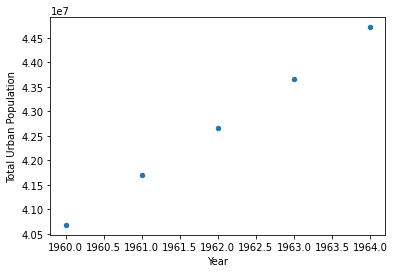

In [76]:
# Writing an iterator to load data in chunks (3)

import matplotlib.pyplot as plt
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/world_ind_pop_data.csv'

# Code from previous exercise
urb_pop_reader = pd.read_csv(fname, chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


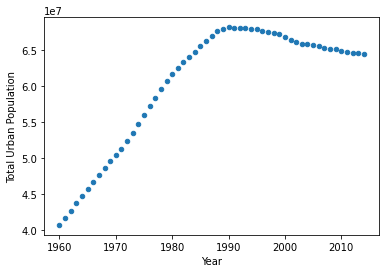

In [77]:
# Writing an iterator to load data in chunks (4)

import matplotlib.pyplot as plt
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/world_ind_pop_data.csv'

# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv(fname, chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)
    
# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


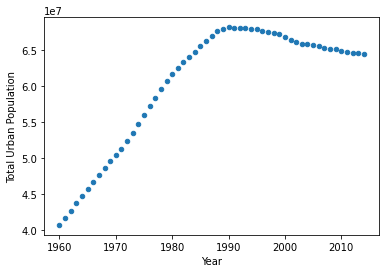

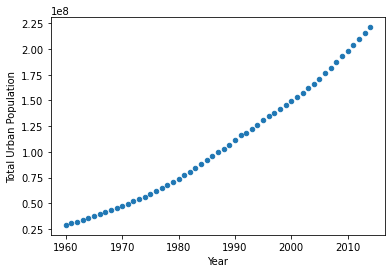

In [79]:
# Writing an iterator to load data in chunks (5)

# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

import matplotlib.pyplot as plt

# Set the filename: fn
fn = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/master/datasets/world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')